In [54]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [55]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [56]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y

In [57]:
# # Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

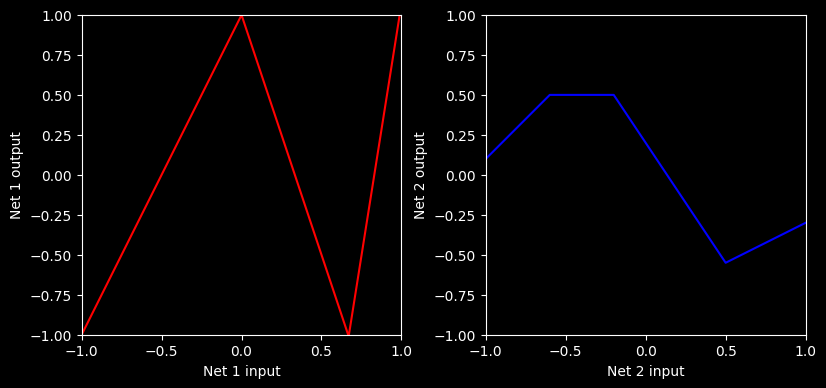

In [58]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Display the two inputs
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot both graphs
plot_neural_two_components(x, net1_out, net2_out)

In [59]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the second one.  Draw the relationship between
# the input of the first network and the output of the second one.

**Answer**: the slopes of the first network will modulate the second network, per joint (12 regions). The second negative slope in first graph will invert (mirror in the y axis) and compess by a factor of ~0.6 the second network response. And so on by each region (total of 3) in the first network.

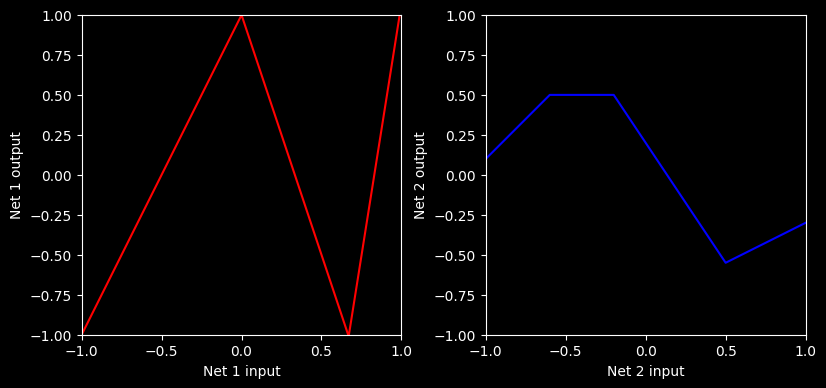

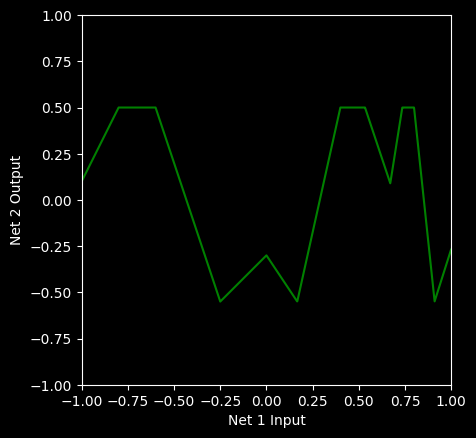

In [60]:
# Now let's see if your predictions were right

# TODO feed the output of first network into second network (replace this line)
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

**Answer**: seems my answer above was correct.

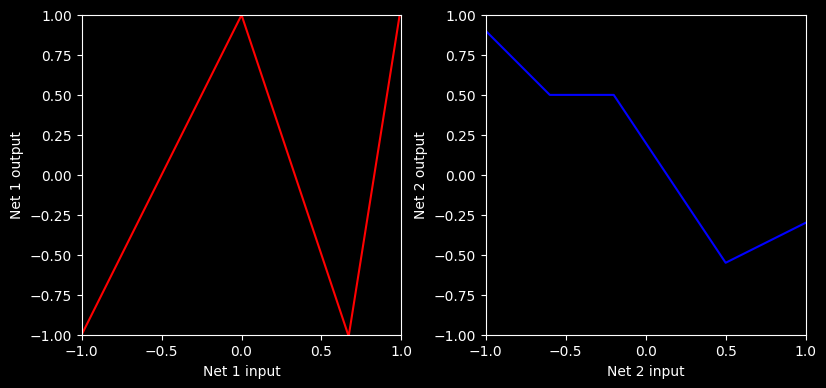

In [61]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [62]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the modified second network.  Draw the relationship between
# the input of the first network and the output of the second one.

**Answer**: As with the previous question, the first network slopes will how many times (3 regions) is the second network repeated, the sign of each slope will dictate if the second network is flipped and how stretched it gets.

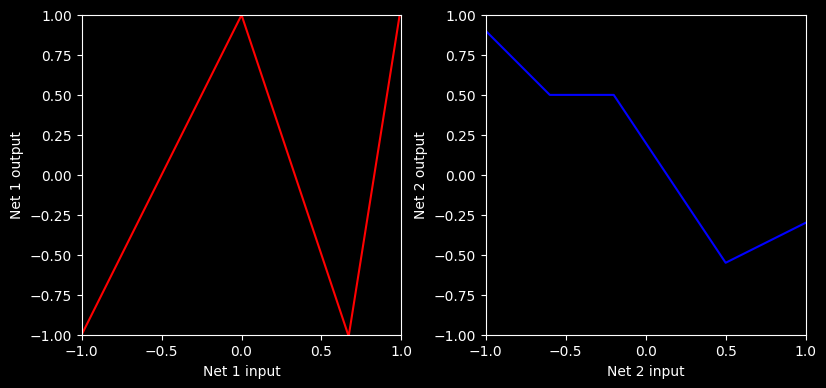

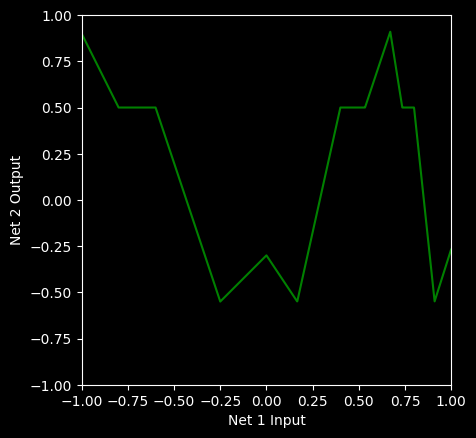

In [63]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

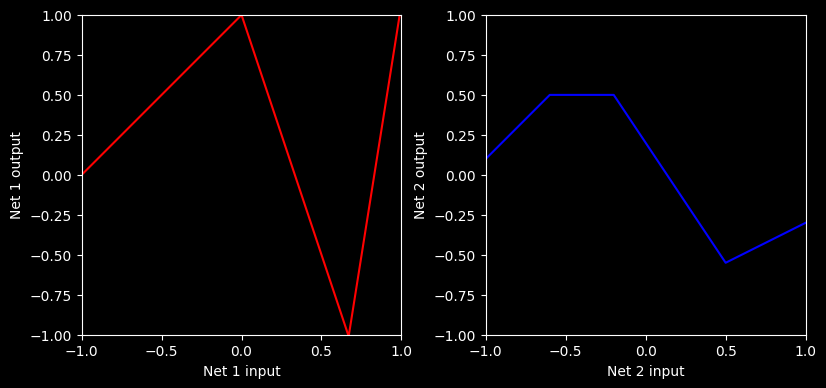

In [64]:
# Let's change things again.  What happens if we change the first network? (note the changes)
# Let's change things again.  What happens if we change the first network? (note the changes)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [65]:

# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the modified first network into the original second network.  Draw the relationship between
# the input of the first network and the output of the second one.

**Answer**: As with previous questions, second network gets "modaulated" by first network and repeated as many times as regions in the first network. Sign of the slope dictates if second network's output gets flipped and the value of the slope dictates the "compression" to fit the size of that region in the first network.

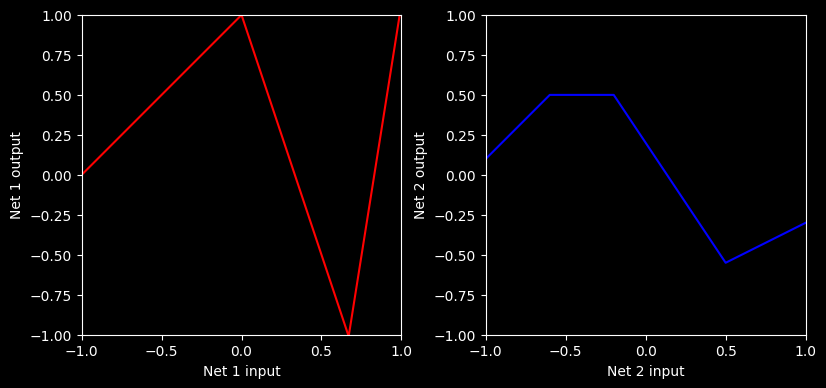

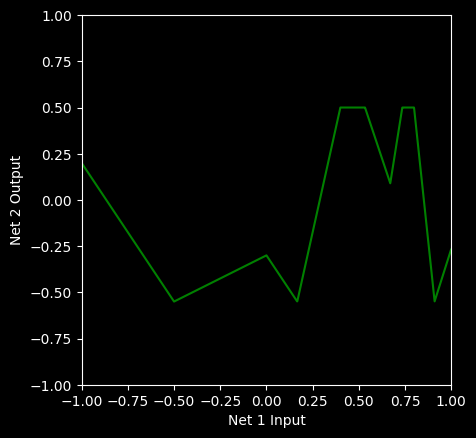

In [66]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

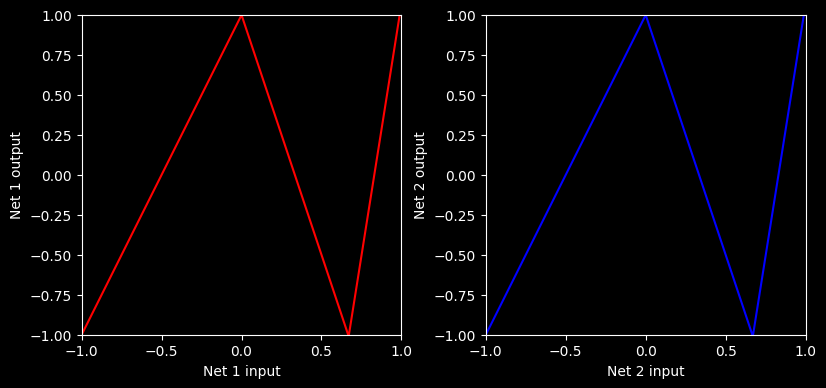

In [67]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

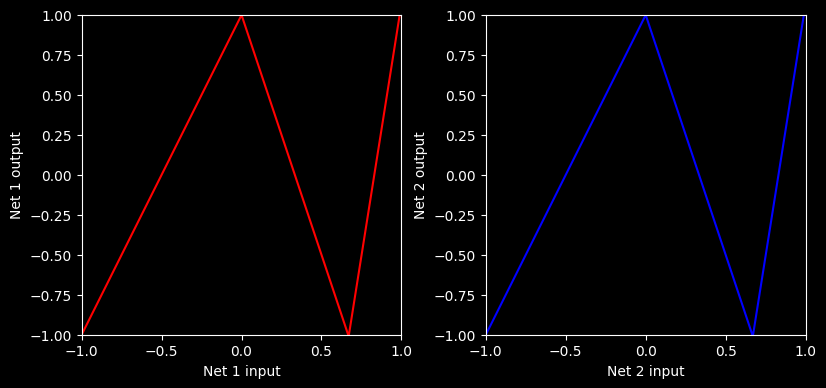

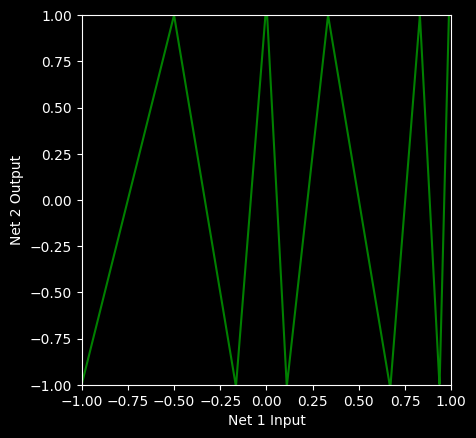

In [68]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

In [ ]:
# TODO
# Contemplate what you think will happen when we feed the
# output of the original first network into a second copy of the original first network, and then
# the output of that into the original second network (so now we have a three layer network)
# How many total linear regions will we have in the output?

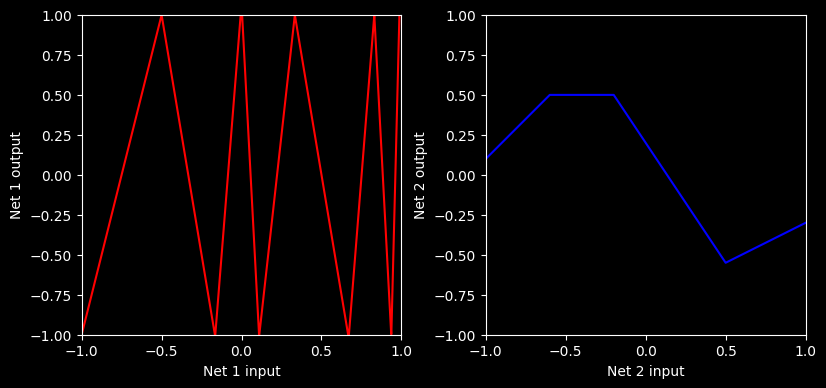

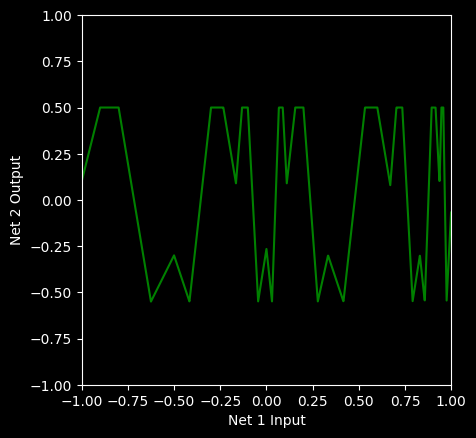

In [69]:
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)